https://www.kaggle.com/code/nghihuynh/understanding-loss-functions-for-classification/notebook

Loss functions ( or Error functions) are used to gauge the error between the prediction output and the provided target value. A loss function will determine the model's performance by comparing the distance between the prediction output and the target values. Smaller loss means the model performs better in yielding predictions closer to the target values.

Loss function (J) that takes the following two parameters:

Predicted output (y_pred)
Target value (y_true)

Loss function will determine model performance by comparing predicted output with the actual target values. If the deviation between y_pred and y_true is very large, the loss value will be very high.

If the deviation is small or the values are nearly identical, it’ll output a very low loss value. Therefore, a proper loss function is necessary if you want to penalize a model properly during training.

Loss functions change based on the problem statement that your model is trying to solve. The goal of training your model is to minimize the error between the target and predicted value by minimizing the loss function.

Based on the nature of research, loss functions are classified as follows:
1. Regression Loss:
Mean Square Error - L2 Loss
Mean Absolute Error - L1 Loss
Huber Loss

2. Classification Loss:
**Binary Classification:**
Hinge Loss,
Sigmoid Cross, Entropy Loss,
Weighted Cross, Entropy Loss,

**Multi-Class Classification:**
Softmax Cross, Entropy Loss,
Sparse Cross, Entropy Loss,
Kullback-Leibler Divergence Loss

In [1]:
!pip install itables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 MB/s eta 0:00:00


In [2]:
# activate interactive mode of pd.dataframe
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import hinge_loss
import random
import tensorflow as tf

 Generate random prediction to test and visualize different loss functions.
 Assumption:
1: CE
0: LAA

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Learning/Loss_Function/train Mayo Clinic.csv')

In [6]:
df.head(4)

image_id  center_id patient_id  image_num label
0  006388_0         11     006388          0    CE
1  008e5c_0         11     008e5c          0    CE
2  00c058_0         11     00c058          0   LAA
3  01adc5_0         11     01adc5          0   LAA

In [7]:
CE = df.loc[df['label']=='CE'][:200]['patient_id'].reset_index()

In [8]:
CE.head(4)

index patient_id
0      0     006388
1      1     008e5c
2      4     026c97
3      6     029c68

In [9]:
LAA = df.loc[df['label']=='LAA'][:100]['patient_id'].reset_index()

In [10]:
target_CE, target_LAA = torch.ones(200), torch.zeros(100)

In [11]:
CE['target'], LAA['target'] = target_CE, target_LAA

In [12]:
CE.head(4)

index patient_id  target
0      0     006388     1.0
1      1     008e5c     1.0
2      4     026c97     1.0
3      6     029c68     1.0

In [13]:
final_df = pd.concat([CE,LAA], ignore_index=True)

In [14]:
final_df.head(4)

index patient_id  target
0      0     006388     1.0
1      1     008e5c     1.0
2      4     026c97     1.0
3      6     029c68     1.0

In [15]:
final_df['index'] = range(0,300)

In [16]:
final_df.shape

(300, 3)

In [17]:
final_df['pred'] = torch.tensor(np.linspace(0,4,300))

In [18]:
final_df.head(10)

index patient_id  target      pred
0      0     006388     1.0  0.000000
1      1     008e5c     1.0  0.013378
2      2     026c97     1.0  0.026756
3      3     029c68     1.0  0.040134
4      4     032f10     1.0  0.053512
5      5     0372b0     1.0  0.066890
6      6     037300     1.0  0.080268
7      7     03e6b7     1.0  0.093645
8      8     0415c3     1.0  0.107023
9      9     04439c     1.0  0.120401

In [19]:
final_df = final_df[['index', 'patient_id', 'pred', 'target']]

In [20]:
final_df

index patient_id      pred  target
0        0     006388  0.000000     1.0
1        1     008e5c  0.013378     1.0
2        2     026c97  0.026756     1.0
3        3     029c68  0.040134     1.0
4        4     032f10  0.053512     1.0
..     ...        ...       ...     ...
295    295     7dd82f  3.946488     0.0
296    296     7dd82f  3.959866     0.0
297    297     821964  3.973244     0.0
298    298     845d82  3.986622     0.0
299    299     862501  4.000000     0.0

[300 rows x 4 columns]

In [21]:
pred = torch.tensor(final_df['pred'].values)

In [22]:
pred[:5]

tensor([0.0000, 0.0134, 0.0268, 0.0401, 0.0535], dtype=torch.float64)

In [23]:
target = torch.tensor(final_df['target'].values)

target[:5]

tensor([1., 1., 1., 1., 1.])

In [24]:
target.unique()

tensor([0., 1.])

1. LOSS FUNCTIONS FOR BINARY CLASSIFICATION

**Hinge loss:** It's mainly developed to be used with Support Vector Machine (SVM) models in machine learning. Target variable must be modified to be in the set of {-1,1}.


**Cross-Entropy/Logistic Loss (CE):** Cross entropy loss is also known as logistic loss function. It's the most common loss for binary classification (two classes 0 and 1). Measuring the distance from the actual class to the predicted value, which is usually a real number between 0 and 1  the sigmoid activation function should be used as the last layer before applying CE. There are 2 types of CE:

1. Sigmoid Cross Entropy Loss: transform the x-values by the sigmoid function before applying the cross entropy loss.
2. Weighted Cross Entropy Loss: weighted version of the sigmoid cross entropy loss. Here, provide a weight on the positive target to control the outliers for positive predictions.

1.1.1. Hinge Loss

J(y^,y)=max(0,1−yi⋅y^)

The squared hinge loss is a loss function used for "maximum margin" binary classification problems. It has the effect of smoothing the surface of the error function and making it numerically easier to work with. Target variable must be modified to be in the set of {-1,1}.

1.1.2. Squared Hinge Loss

(y^,y)=∑i=0N(max(0,1−yi⋅y^)2)

In [25]:
def HingeLoss(y_pred, y_true):
    """Average hinge loss (non-regularized)

    Parameters:
    ----------
    y_true: torch tensor of shape (n_samples,)
        True target, consisting of integers of two values. The positive lable must
        be greater than the negative label

    y_predicted: torch tensor of shape (n_samples,)
        Prediction, as output by a decision function (floats)

    Returns:
    ----------
    list: tensor list of calculated loss
    mean: mean loss of the batch
        Hinge loss
    """
    list_ = torch.Tensor([max(0, 1 - x*y) for x,y in zip(y_pred, y_true)])
    return list_, torch.mean(list_)

In [26]:
Hinge_list, mean = HingeLoss(pred[:200], target[:200])

In [27]:
Hinge_list

tensor([1.0000, 0.9866, 0.9732, 0.9599, 0.9465, 0.9331, 0.9197, 0.9064, 0.8930,
        0.8796, 0.8662, 0.8528, 0.8395, 0.8261, 0.8127, 0.7993, 0.7860, 0.7726,
        0.7592, 0.7458, 0.7324, 0.7191, 0.7057, 0.6923, 0.6789, 0.6656, 0.6522,
        0.6388, 0.6254, 0.6120, 0.5987, 0.5853, 0.5719, 0.5585, 0.5452, 0.5318,
        0.5184, 0.5050, 0.4916, 0.4783, 0.4649, 0.4515, 0.4381, 0.4247, 0.4114,
        0.3980, 0.3846, 0.3712, 0.3579, 0.3445, 0.3311, 0.3177, 0.3043, 0.2910,
        0.2776, 0.2642, 0.2508, 0.2375, 0.2241, 0.2107, 0.1973, 0.1839, 0.1706,
        0.1572, 0.1438, 0.1304, 0.1171, 0.1037, 0.0903, 0.0769, 0.0635, 0.0502,
        0.0368, 0.0234, 0.0100, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [28]:
mean

tensor(0.1894)

<ipython-input-29-e0edd2c62f29>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


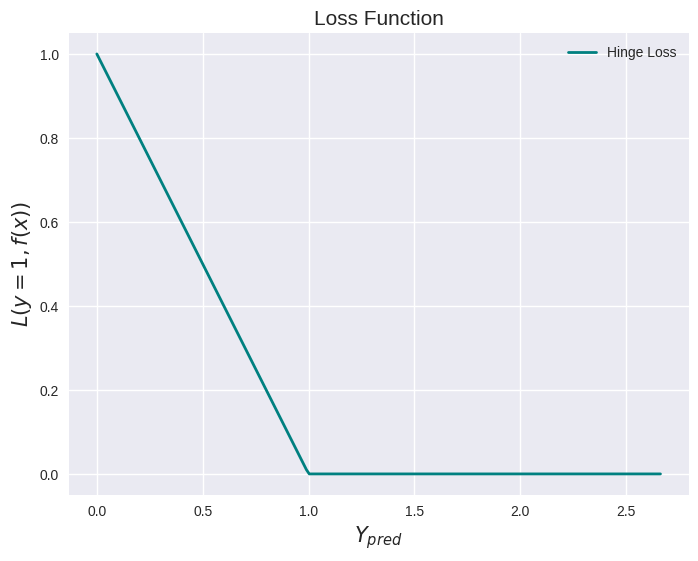

In [29]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.plot(pred[:200].numpy(), Hinge_list.numpy(), color='teal', label='Hinge Loss', linewidth=2.0 )
plt.legend(loc="upper right")
plt.ylabel("$L(y=1, f(x))$")
#plt.ylim(0,0.8)
#plt.xlim(0,1.0)
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel("$L(y=1, f(x))$", fontsize=15)
plt.title('Loss Function', fontsize=15)
plt.show()

1.2. Cross Entropy (Logistic Loss).

1.2.1. Sigmoid Cross Entropy

J(y^,y)=−1N∑i=1N[yi⋅log(yi^)+(1−yi)⋅log(1−yi^)]

In [30]:
def BinaryCrossEntropy(y_pred, y_true):
    """Binary cross entropy loss

    Parameters:
    -----------
    y_true: tensor of shape (n_samples,)
        True target, consisting of integers of two values.
    y_pred: tensor of shape (n_samples,)
        Prediction, as output by a decision function (floats)

    Returns:
    -----------
    list_loss: tensor of shape (n_samples,)
        BCE loss list
    loss: float
        BCE loss
    """
    #y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7) to avoid the extremes of the log function
    term_0 = y_true * torch.log(y_pred + 1e-7)
    term_1 = (1-y_true) * torch.log(1-y_pred + 1e-7)
    return -(term_0+term_1),-torch.mean(term_0+term_1, axis=0)

In [31]:
BCE_list, loss = BinaryCrossEntropy(pred[:200].sigmoid(),target[:200])

In [34]:
BCE_list

tensor([0.6931, 0.6865, 0.6799, 0.6733, 0.6667, 0.6603, 0.6538, 0.6474, 0.6411,
        0.6348, 0.6285, 0.6223, 0.6161, 0.6100, 0.6039, 0.5978, 0.5918, 0.5859,
        0.5800, 0.5741, 0.5683, 0.5625, 0.5568, 0.5511, 0.5454, 0.5398, 0.5343,
        0.5288, 0.5233, 0.5179, 0.5125, 0.5071, 0.5018, 0.4966, 0.4914, 0.4862,
        0.4811, 0.4760, 0.4709, 0.4659, 0.4610, 0.4560, 0.4512, 0.4463, 0.4415,
        0.4368, 0.4321, 0.4274, 0.4228, 0.4182, 0.4136, 0.4091, 0.4046, 0.4002,
        0.3958, 0.3915, 0.3871, 0.3829, 0.3786, 0.3744, 0.3703, 0.3662, 0.3621,
        0.3580, 0.3540, 0.3500, 0.3461, 0.3422, 0.3384, 0.3345, 0.3308, 0.3270,
        0.3233, 0.3196, 0.3160, 0.3124, 0.3088, 0.3053, 0.3018, 0.2983, 0.2949,
        0.2915, 0.2881, 0.2848, 0.2815, 0.2782, 0.2750, 0.2718, 0.2686, 0.2655,
        0.2624, 0.2593, 0.2562, 0.2532, 0.2503, 0.2473, 0.2444, 0.2415, 0.2387,
        0.2358, 0.2330, 0.2303, 0.2275, 0.2248, 0.2221, 0.2195, 0.2169, 0.2143,
        0.2117, 0.2092, 0.2067, 0.2042, 

In [35]:
loss

tensor(0.2837, dtype=torch.float64)

<ipython-input-36-14eba04f6f57>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


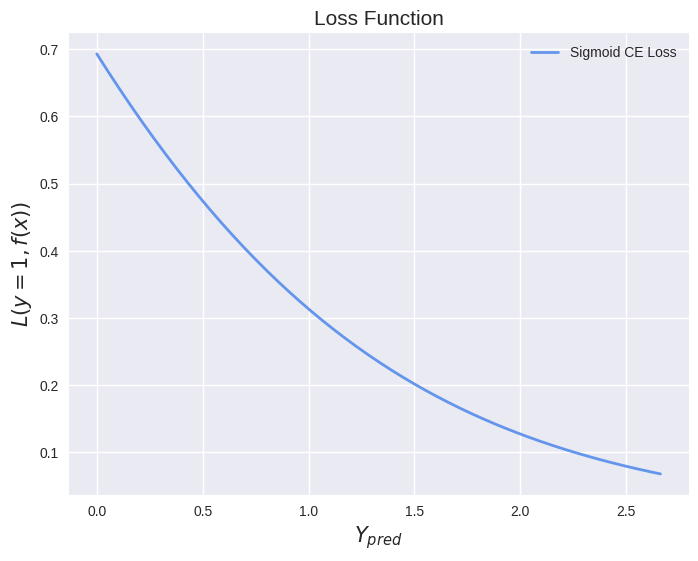

In [36]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.plot(pred[:200].numpy(), BCE_list.numpy(), color='cornflowerblue', label='Sigmoid CE Loss', linewidth=2.0 )
plt.legend(loc="upper right")
plt.ylabel("$L(y=1, f(x))$")
#plt.ylim(0,0.8)
#plt.xlim(0,1.0)
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel("$L(y=1, f(x))$", fontsize=15)
plt.title('Loss Function', fontsize=15)
plt.show()

1.2.2. Weighted Cross Entropy  
Weighted version of the sigmoid cross entropy loss. Weights can be used to control the outliers for positive predictions. To deal with class imbalance. This is also the evaluation metric in this competition.

J(y^,y)=−∑Mi=1wi⋅∑Nj=1yi,jNi⋅lny^i,j∑Mi=1wi

In [37]:
# weigh 1 = 0.5
pos_weight_1 = torch.tensor([0.5])
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight_1, reduction='none')
bce_weight_loss_1 = criterion(pred[:200], target[:200]) #forward

# weight 2 = 0.75
pos_weight_2 = torch.tensor([0.75])
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight_2, reduction='none')
bce_weight_loss_2 = criterion(pred[:200], target[:200])
#bce_weight_loss.shape

<ipython-input-38-838bdce69295>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


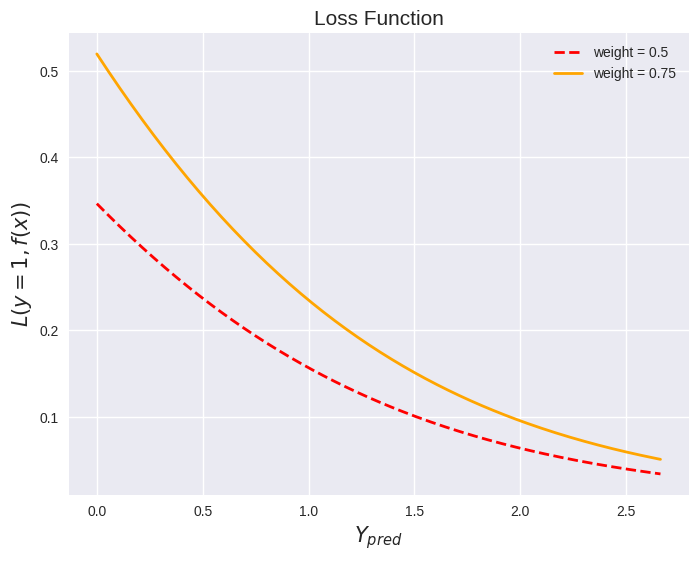

In [38]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.plot(pred[:200].numpy(), bce_weight_loss_1.numpy(), 'r--', label='weight = 0.5', linewidth=2.0 )
plt.plot(pred[:200].numpy(), bce_weight_loss_2.numpy(), 'orange', label='weight = 0.75', linewidth=2.0)
plt.legend(loc="upper right")
plt.ylabel("$L(y=1, f(x))$")
#plt.ylim(0,0.8)
#plt.xlim(0,1.0)
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel("$L(y=1, f(x))$", fontsize=15)
plt.title('Loss Function', fontsize=15)
plt.show()

Visualization for Binary Classification Loss Functions

<ipython-input-39-77f0a2bd098b>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


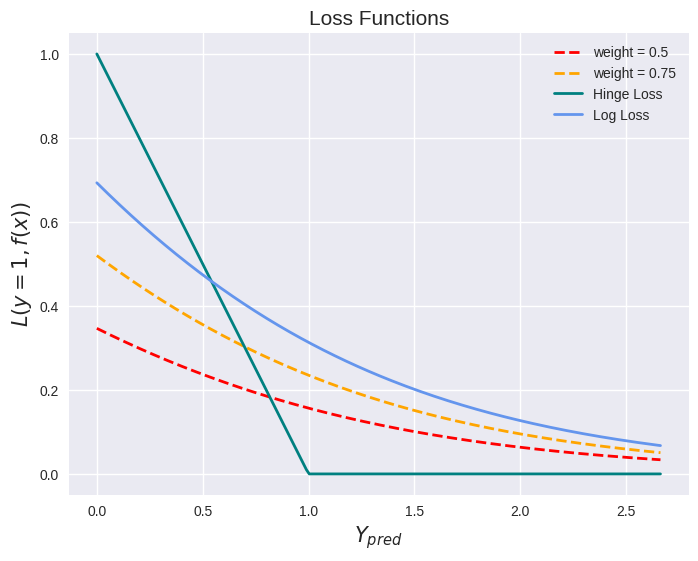

In [39]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.plot(pred[:200].numpy(), bce_weight_loss_1.numpy(), 'r--', label='weight = 0.5', linewidth=2.0 )
plt.plot(pred[:200].numpy(), bce_weight_loss_2.numpy(), 'orange',linestyle='dashed',label='weight = 0.75', linewidth=2.0)
plt.plot(pred[:200].numpy(), Hinge_list[:200].numpy(), color="teal",label="Hinge Loss",linewidth=2.0)
plt.plot(pred[:200].numpy(), BCE_list.numpy(),color="cornflowerblue", label="Log Loss", linewidth=2.0)
plt.legend(loc="upper right")
plt.ylabel("$L(y=1, f(x))$")
#plt.ylim(0,1.0)
#plt.xlim(0,3)
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel("$L(y=1, f(x))$", fontsize=15)
plt.title('Loss Functions', fontsize=15)
plt.show()

2. LOSS FUNCTIONS FOR MULTI-CLASS CLASSIFICATION

2.1. Categorical Cross-Entropy

Instead of using sigmoid as the last layer activation, we use softmax for Categorical Cross-Entropy Loss.

In [40]:
BCE_list_cat, loss = BinaryCrossEntropy(pred[:200].softmax(dim=0),target[:200])

<ipython-input-41-ed89c0b72517>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


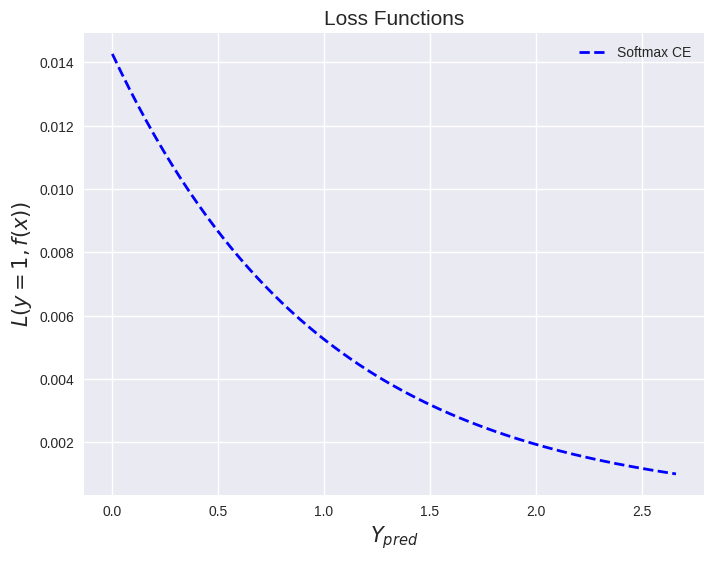

In [41]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.plot(pred[:200].numpy(), BCE_list_cat.softmax(dim=0).numpy(), 'b--', label='Softmax CE', linewidth=2.0 )
plt.legend(loc="upper right")
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel("$L(y=1, f(x))$", fontsize=15)
plt.title('Loss Functions', fontsize=15)
plt.show()

2.2.Sparse Categorical Cross-Entropy

This loss is the same as the softmax cross-entropy one, except instead of the target being a probability distribution, it is an index of which category is true. Instead of a sparse all-zero target vector with one value of one, we just pass in the index of which category is the true value, as follows:

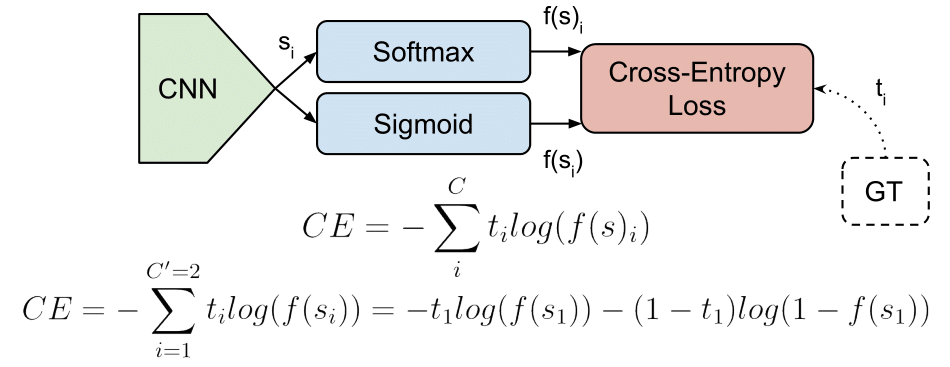

In [42]:
m = nn.LogSoftmax(dim=0)

criterion = nn.NLLLoss(reduction='none')

x = torch.tensor(np.linspace(0,4,400).reshape(200,2), dtype=torch.float32)
y = target[:200].long()#torch.ones(250, dtype=torch.long) # expect the target to be integer (Long)

sparse_loss = criterion(m(x), y)

<ipython-input-43-71c549cf2860>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


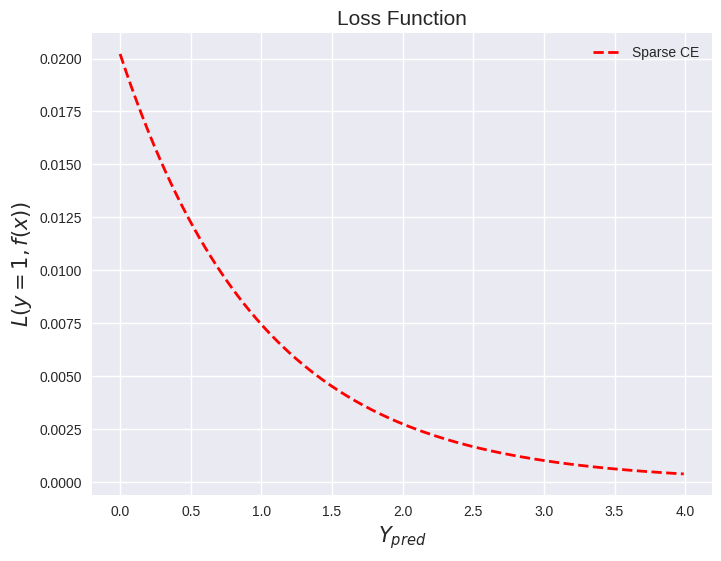

In [43]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.plot(x[:,0].numpy(), sparse_loss.softmax(dim=0).numpy(), 'r--', label='Sparse CE', linewidth=2.0 )
plt.legend(loc="upper right")
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel("$L(y=1, f(x))$", fontsize=15)
plt.title('Loss Function', fontsize=15)
plt.show()

2.3. Kullback Leibler Divergence Loss

To avoid underflow issues when computing this quantity, this loss expects the argument input in the log-space. The argument target may also be provided in the log-space if log_target= True.

In [44]:
kl_loss = torch.nn.KLDivLoss(reduction='none', log_target=True) #specify whether the target is the log space
# input should be a distribution in the log space
input_ = F.log_softmax(pred[:200], dim=0)
log_target = F.log_softmax(target[:200], dim=0)
output = kl_loss(input_, log_target)

Visualization for Multi-Class Classification Loss Functions

<ipython-input-45-66c87496da25>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


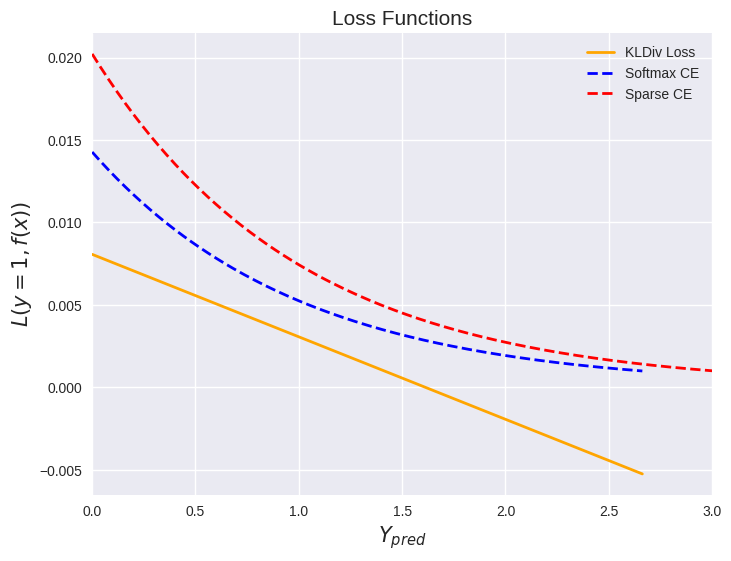

In [45]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.plot(pred[:200].numpy(), output.numpy(), 'orange', label='KLDiv Loss',linewidth=2.0 )
plt.plot(pred[:200].numpy(), BCE_list_cat.softmax(dim=0).numpy(), 'b--', label='Softmax CE', linewidth=2.0 )
plt.plot(x[:,0].numpy(), sparse_loss.softmax(dim=0).numpy(), 'r--', label='Sparse CE', linewidth=2.0 )
plt.legend(loc="upper right")
plt.xlim(0,3)
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel("$L(y=1, f(x))$", fontsize=15)
plt.title('Loss Functions', fontsize=15)
plt.show()